In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set()

In [4]:
df = pd.read_csv('Consumo_cerveja.csv')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tratamento de NA's e Zeros
---

In [6]:
df.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [7]:
df.dropna(axis=0, how='all', inplace=True)

In [8]:
df.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

## Trocando vírgula por ponto 
---

In [10]:
def real_br_to_float(numeric_string):
    """Converte valores numérios no formato brasileiro 1.234,56 para float"""
    try:
        return float(numeric_string.replace(".", "").replace(",", "."))
    except:
        return numeric_string

In [11]:
cols_to_dot = ['Temperatura Media (C)',
               'Temperatura Minima (C)',
               'Temperatura Maxima (C)',
               'Precipitacao (mm)']


In [13]:
for cols in cols_to_dot:
    df[cols] = df[cols].apply(real_br_to_float)

In [15]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


## Tratamento da coluna 'Data'
---

In [16]:
df['Data'] = df['Data'].astype('datetime64[ns]')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 30.9 KB


In [18]:
df2 = df.copy()

In [19]:
df2.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


## Iniciando plotagem dos gráficos

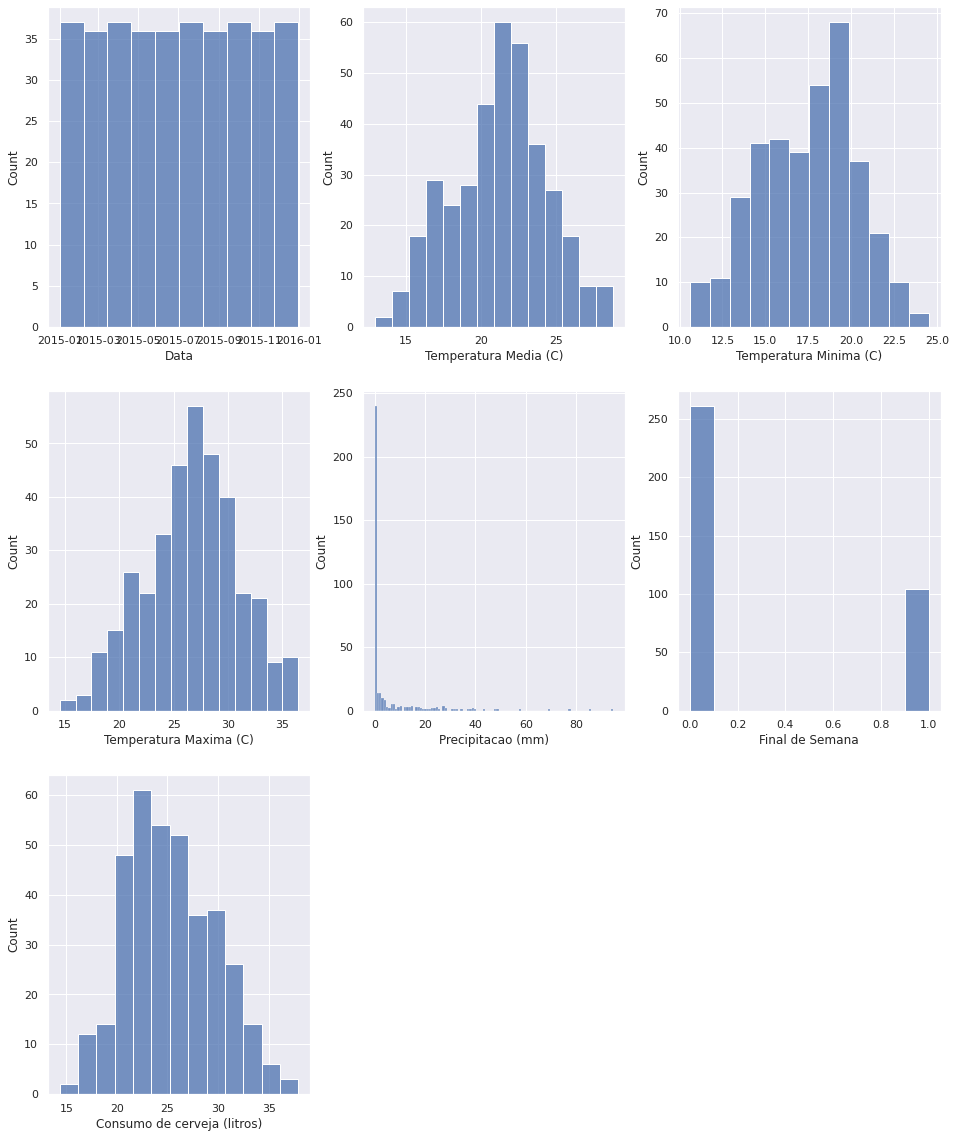

In [20]:
# Plotar um histograma para cada coluna
# começando por 1
# plotar em 3 linhas e 3 colunas
# i = índice colunas

plt.figure(figsize=(16,20))
for i, column in enumerate(df2.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df2[column])

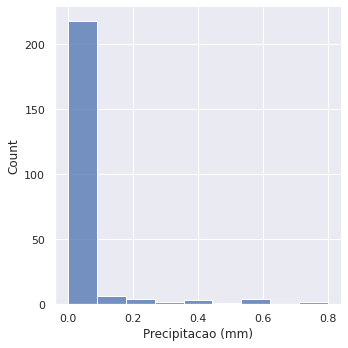

In [22]:
q = df2['Precipitacao (mm)'].quantile(0.75)
data_1 = df2[df2['Precipitacao (mm)']<1]


sns.displot(data_1['Precipitacao (mm)'])

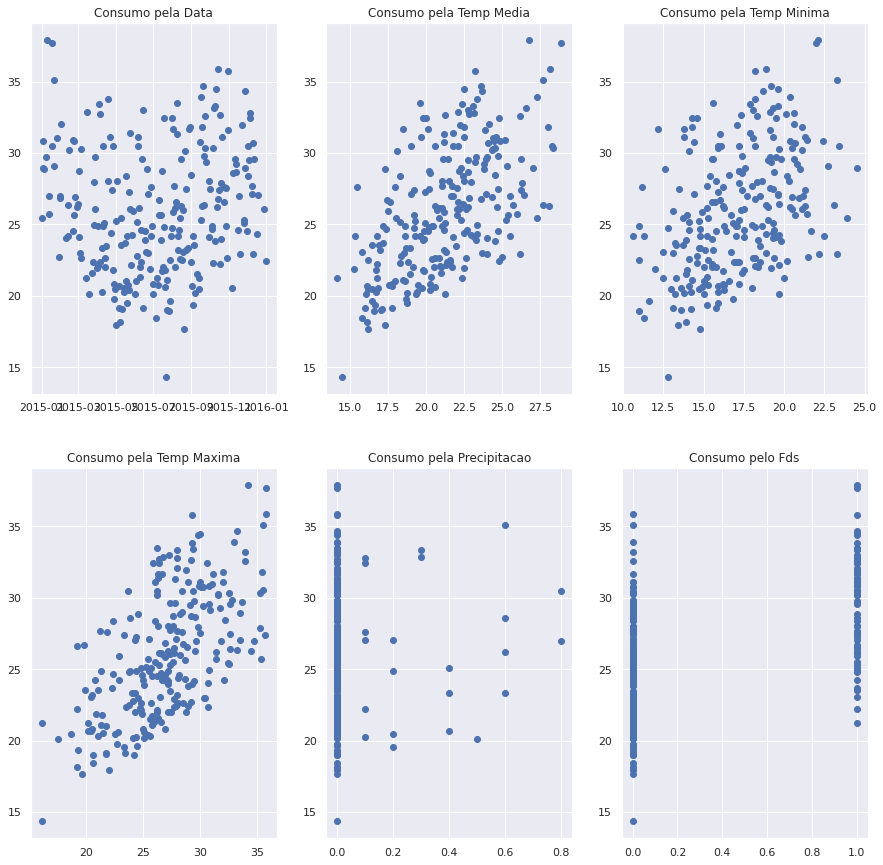

In [24]:
f, axs = plt.subplots(2, 3, sharey=True, figsize =(15,15))
axs[0,0].scatter(data_1['Data'],data_1['Consumo de cerveja (litros)'])
axs[0,0].set_title('Consumo pela Data')
axs[0,1].scatter(data_1['Temperatura Media (C)'],data_1['Consumo de cerveja (litros)'])
axs[0,1].set_title('Consumo pela Temp Media')
axs[0,2].scatter(data_1['Temperatura Minima (C)'],data_1['Consumo de cerveja (litros)'])
axs[0,2].set_title('Consumo pela Temp Minima')
axs[1,0].scatter(data_1['Temperatura Maxima (C)'],data_1['Consumo de cerveja (litros)'])
axs[1,0].set_title('Consumo pela Temp Maxima')
axs[1,1].scatter(data_1['Precipitacao (mm)'],data_1['Consumo de cerveja (litros)'])
axs[1,1].set_title('Consumo pela Precipitacao')
axs[1,2].scatter(data_1['Final de Semana'],data_1['Consumo de cerveja (litros)'])
axs[1,2].set_title('Consumo pelo Fds')

plt.show()

In [26]:
df3 = data_1
df3

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
6,2015-01-07,24.00,19.5,33.7,0.0,0.0,29.732
...,...,...,...,...,...,...,...
345,2015-12-12,23.92,20.6,30.8,0.0,1.0,29.579
350,2015-12-17,23.32,18.9,28.7,0.0,0.0,24.337
351,2015-12-18,26.42,19.6,33.5,0.1,0.0,27.042
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095


## KNN Regressor 
----

In [27]:
import scipy.spatial
from collections import Counter
from sklearn.model_selection import train_test_split

In [28]:
df3.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [29]:
data_cols = ['Temperatura Media (C)',
             'Temperatura Minima (C)',
             'Temperatura Maxima (C)',
             'Precipitacao (mm)']

In [35]:
X = df3[data_cols].values
y = list(df3['Consumo de cerveja (litros)'])

### Dividir dados em treinamento e teste
---

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [37]:
# https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def mean_distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            sumk = 0.0
            for d, j in d:
                sumk += y_train[j]
            meank = round(sumk/self.k, 3)
            final_output.append(meank)
        return final_output
    
    def mse(self, X_test, y_test): # Mean Squared Error
        predictions = self.predict(X_test)
        sum_square = 0.0
        n = len(X_test)
        for i in range(n):
            sum_square += (y_test[i] - predictions[i])**2
        print(sum_square)
        mean_square = sum_square/n
        return mean_square


- We will pass the K while creating an object for the class ‘KNN’.

- Fit method just takes in the training data, nothing else.

- We used scipy.spatial.distance.euclidean for calculating the distance between two points.

- Predict method runs a loop for every test data point, each time calculating distance between the test instance and every training instance. It stores distance and index of the training data together in a 2D list. It then sorts that list based on distance and then updates the list keeping only the K shortest distances(along with their indices) in the list.

- It then pulls out labels corresponding to those K nearest data points and checks which label has the majority using Counter. That majority label becomes the label of the test data point.

- Score method just compares our test output with their actual output to find the accuracy of our prediction.

In [ ]:
# class KNN:
#     def __init__(self, k):
#         self.k = k
        
#     def fit(self, X, y):
#         self.X_train = X
#         self.y_train = y
        
#     def distance(self, X1, X2):
#         distance = scipy.spatial.distance.euclidean(X1, X2)
    
#     def predict(self, X_test):
#         final_output = []
#         for i in range(len(X_test)):
#             d = []
#             votes = []
#             for j in range(len(X_train)):
#                 dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
#                 d.append([dist, j])
#             d.sort()
#             d = d[0:self.k]
#             for d, j in d:
#                 votes.append(y_train[j])
#             ans = Counter(votes).most_common(1)[0][0]
#             final_output.append(ans)
            
#         return final_output
    
#     def score(self, X_test, y_test):
#         predictions = self.predict(X_test)
#         return (predictions == y_test).sum() / len(y_test)

### Testando...
---

In [43]:
beer = KNN(3)
beer.fit(X_train, y_train)
prediction = beer.predict(X_test)

for i in range(len(prediction)):
    print(f"Previsão: {prediction[i]}. Observado: {y_test[i]}")

Previsão: 29.441. Observado: 25.692
Previsão: 30.771. Observado: 25.743
Previsão: 21.644. Observado: 25.142
Previsão: 22.776. Observado: 27.146
Previsão: 26.117. Observado: 23.898
Previsão: 17.532. Observado: 21.252
Previsão: 25.388. Observado: 22.933
Previsão: 24.91. Observado: 26.075
Previsão: 31.946. Observado: 30.524
Previsão: 26.453. Observado: 26.127
Previsão: 28.728. Observado: 33.45
Previsão: 22.752. Observado: 26.594
Previsão: 23.415. Observado: 20.161
Previsão: 21.599. Observado: 19.345
Previsão: 20.379. Observado: 24.863
Previsão: 30.086. Observado: 32.78
Previsão: 26.134. Observado: 24.114
Previsão: 22.47. Observado: 27.03
Previsão: 25.677. Observado: 29.621
Previsão: 26.172. Observado: 22.032
Previsão: 26.129. Observado: 32.473
Previsão: 30.404. Observado: 24.219
Previsão: 30.599. Observado: 29.579
Previsão: 29.285. Observado: 22.988
Previsão: 31.272. Observado: 33.93
Previsão: 25.081. Observado: 22.61
Previsão: 35.821. Observado: 35.127
Previsão: 21.599. Observado: 22.199

In [41]:
comp = pd.DataFrame()
comp['Previsão'] = prediction
comp['Observado'] = y_test
comp.head()

,Previsão,Observado
0,29.441,25.692
1,30.771,25.743
2,21.644,25.142
3,22.776,27.146
4,26.117,23.898


In [42]:
beer.mse(X_test, y_test)

636.7369430000002


13.265352979166671

The MSE is a measure of the quality of an estimator. As it is derived from the square of Euclidean distance, it is always a positive value with the error decreasing as the error approaches zero.